In [ ]:
#ignore
#import pandas as pd
#!pip install altair vega_datasets
# run this in a notebook cell
#import sys
#print("Python exec:", sys.executable)

# install/upgrade typing_extensions (and Altair/vega_datasets just in case)
#!{sys.executable} -m pip install --upgrade typing_extensions altair vega_datasets

Python exec: /Users/dylanwang/anaconda3/bin/python


In [2]:
# Python
# Load data and show quick preview
import pandas as pd

url = "https://raw.githubusercontent.com/UIUC-iSchool-DataViz/is445_data/main/building_inventory.csv"
df = pd.read_csv(url)

# Quick inspection
print("Shape:", df.shape)
display(df.head(10))
print("\nColumns:", list(df.columns))
print("\nInfo:")
display(df.info())

Shape: (8862, 22)


,Agency Name,Location Name,Address,City,Zip code,County,Congress Dist,Congressional Full Name,Rep Dist,Rep Full Name,...,Bldg Status,Year Acquired,Year Constructed,Square Footage,Total Floors,Floors Above Grade,Floors Below Grade,Usage Description,Usage Description 2,Usage Description 3
0,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,1975,1975,144,1,1,0,Unusual,Unusual,Not provided
1,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided
2,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided
3,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided
4,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided
5,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided
6,Department of Natural Resources,Dixon Springs State Park - Pope County,Rr #2,Golconda,62938,Pope,15,John Shimkus,118,Phelps Brandon W.,...,In Use,2000,2000,120,1,1,0,Unusual,Unusual,Not provided
7,Department of Natural Resources,Dixon Springs State Park - Pope County,Rr #2,Golconda,62938,Pope,15,John Shimkus,118,Phelps Brandon W.,...,In Use,2000,2000,120,1,1,0,Unusual,Unusual,Not provided
8,Department of Natural Resources,Matthiessen State Park - LaSalle County,"R. R. 178, Box 509",Utica,61373,LaSalle,16,Adam Kinzinger,76,Long Jerry Lee,...,In Use,2000,2000,144,1,1,0,Unusual,Unusual,Not provided
9,Department of Natural Resources,Matthiessen State Park - LaSalle County,"R. R. 178, Box 509",Utica,61373,LaSalle,16,Adam Kinzinger,76,Long Jerry Lee,...,In Use,2000,2000,144,1,1,0,Unusual,Unusual,Not provided



Columns: ['Agency Name', 'Location Name', 'Address', 'City', 'Zip code', 'County', 'Congress Dist', 'Congressional Full Name', 'Rep Dist', 'Rep Full Name', 'Senate Dist', 'Senator Full Name', 'Bldg Status', 'Year Acquired', 'Year Constructed', 'Square Footage', 'Total Floors', 'Floors Above Grade', 'Floors Below Grade', 'Usage Description', 'Usage Description 2', 'Usage Description 3']

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8862 entries, 0 to 8861
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Agency Name              8862 non-null   object
 1   Location Name            8862 non-null   object
 2   Address                  8811 non-null   object
 3   City                     8862 non-null   object
 4   Zip code                 8862 non-null   int64 
 5   County                   8837 non-null   object
 6   Congress Dist            8862 non-null   int64 
 7   Congressional 

None

In [3]:
# Python
# Detect candidate categorical and numeric columns automatically
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

# If there are no object columns, try columns with small number of unique values
if not cat_cols:
    for c in df.columns:
        if df[c].nunique(dropna=True) <= 30:
            cat_cols.append(c)
            break

num_cols = df.select_dtypes(include=['number']).columns.tolist()

print("Categorical candidates:", cat_cols)
print("Numeric candidates:", num_cols)

# pick one categorical and up to two numeric columns for plotting
cat_col = cat_cols[0] if cat_cols else None
num_col1 = num_cols[0] if len(num_cols) >= 1 else None
num_col2 = num_cols[1] if len(num_cols) >= 2 else None

Categorical candidates: ['Agency Name', 'Location Name', 'Address', 'City', 'County', 'Congressional Full Name', 'Rep Full Name', 'Senator Full Name', 'Bldg Status', 'Usage Description', 'Usage Description 2', 'Usage Description 3']
Numeric candidates: ['Zip code', 'Congress Dist', 'Rep Dist', 'Senate Dist', 'Year Acquired', 'Year Constructed', 'Square Footage', 'Total Floors', 'Floors Above Grade', 'Floors Below Grade']


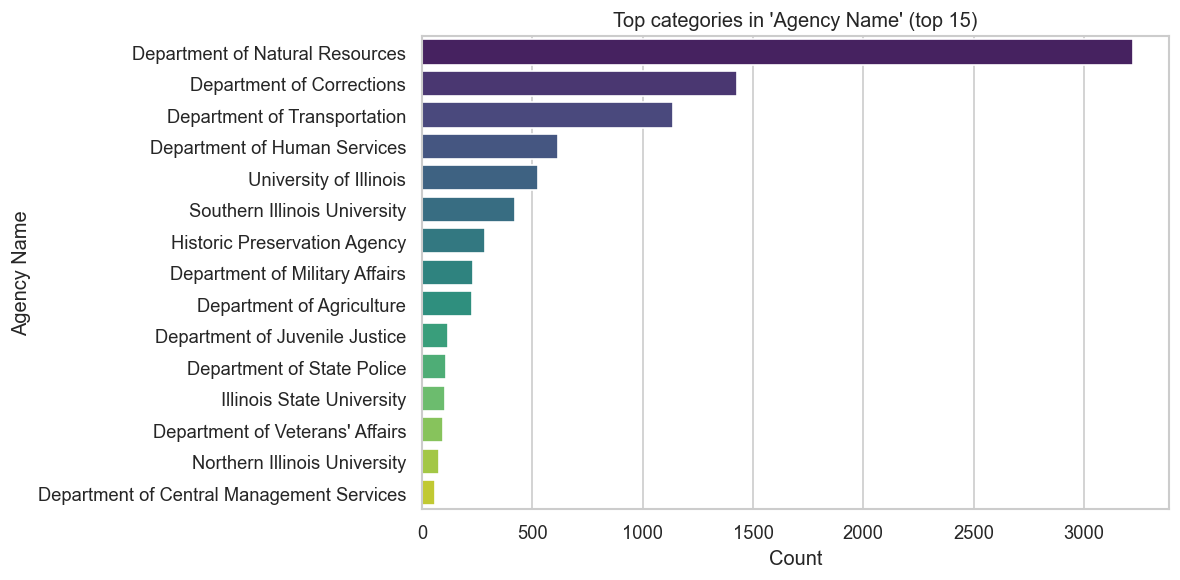

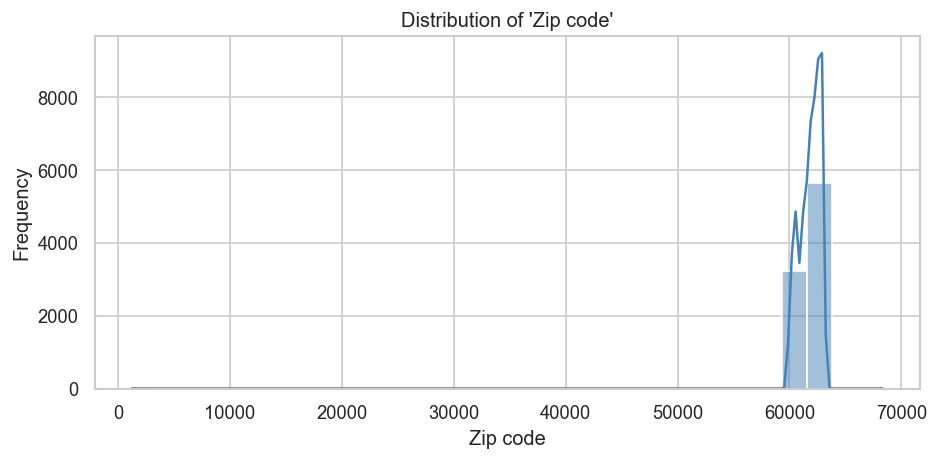

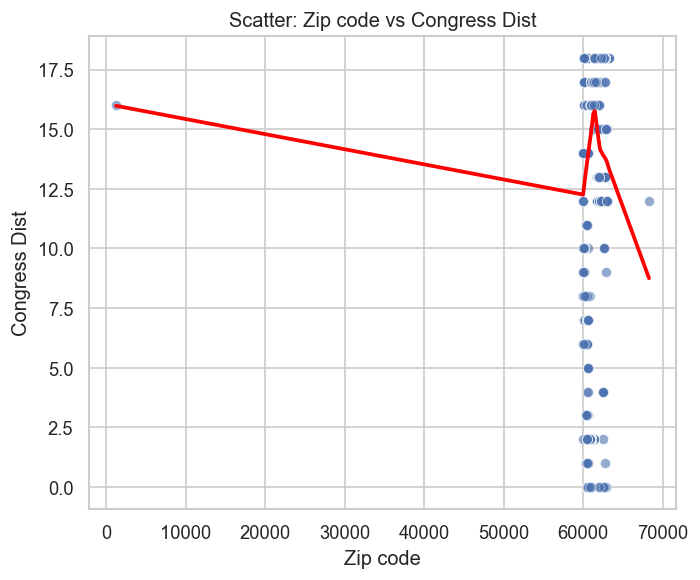

In [4]:
# Python
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams['figure.dpi'] = 120

# 1) Bar chart of top categories (if available)
if cat_col:
    vc = df[cat_col].value_counts(dropna=True).head(15)  # top 15
    plt.figure(figsize=(10, 5))
    sns.barplot(x=vc.values, y=vc.index, palette="viridis")
    plt.title(f"Top categories in '{cat_col}' (top {len(vc)})")
    plt.xlabel("Count")
    plt.ylabel(cat_col)
    plt.tight_layout()
    plt.show()
else:
    print("No categorical column detected for bar chart.")

# 2) Histogram for a numeric column (if available)
if num_col1:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[num_col1].dropna(), kde=True, color="steelblue", bins=30)
    plt.title(f"Distribution of '{num_col1}'")
    plt.xlabel(num_col1)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()
else:
    print("No numeric column detected for histogram.")

# 3) Scatter plot if two numeric columns exist
if num_col1 and num_col2:
    plt.figure(figsize=(6, 5))
    sns.scatterplot(data=df, x=num_col1, y=num_col2, alpha=0.6)
    sns.regplot(data=df, x=num_col1, y=num_col2, scatter=False, color="red", lowess=True)
    plt.title(f"Scatter: {num_col1} vs {num_col2}")
    plt.tight_layout()
    plt.show()
else:
    print("Need two numeric columns for a scatter plot; only one or none found.")

In [ ]:
#Ignore
# import altair as alt

#legend = alt.selection_point(fields=['Primary Use'], bind='legend')

#chart2_interactive = (
#    chart2_base               # <- your existing scatter (without color)
#    .encode(
#        color=alt.condition(legend, 'Primary Use:N', alt.value('lightgray'))
#    )
#    .add_params(legend)
#)


In [ ]:

#Putting the dropdown 
#Also saving the html files

import re
import pandas as pd
import altair as alt

alt.data_transformers.disable_max_rows()

# --- Load data (change if you picked a different dataset) ---
URL = "https://raw.githubusercontent.com/UIUC-iSchool-DataViz/is445_data/main/building_inventory.csv"
df = pd.read_csv(URL)

# ---------- Helpers to robustly pick columns ----------
def _norm(s):  # normalize: lowercase, strip non-alphanumerics
    return re.sub(r'[^a-z0-9]+', '', str(s).lower()) if s is not None else None

def pick(df, candidates, required=True):
    """
    Pick the first existing column from candidates (case/space tolerant).
    Raise if required and none found.
    """
    cols = list(df.columns)
    norm_map = {_norm(c): c for c in cols}
    for cand in candidates:
        if _norm(cand) in norm_map:
            return norm_map[_norm(cand)]
    if required:
        raise KeyError(f"Could not find any of: {candidates}")
    return None  # optional

# Try common name variants for each field
AGENCY = pick(df, ["Agency Name", "Agency", "Agency_Name", "AgencyName"])
YEAR   = pick(df, ["Year Constructed", "Year Built", "Year", "Year_Built", "Construction Year"])
SQFT   = pick(df, ["Square Footage", "Gross Sq Ft", "Gross SqFt", "Sq Ft", "SqFt", "Total Sq Ft"])
PUSE   = pick(df, ["Primary Use", "Primary Use Description", "Primary Use Category",
                   "Use Primary", "PrimaryUse"], required=False)  # optional
BNAME  = pick(df, ["Building Name", "Facility Name", "Location Name", "Bldg Name"], required=False)

print("Detected columns:")
print("  AGENCY:", AGENCY)
print("  YEAR  :", YEAR)
print("  SQFT  :", SQFT)
print("  PUSE  :", PUSE)
print("  BNAME :", BNAME)

# ---------- Clean types ----------
df[SQFT] = pd.to_numeric(df[SQFT], errors="coerce")
df[YEAR] = pd.to_numeric(df[YEAR], errors="coerce")
df = df.dropna(subset=[SQFT, YEAR])

# ======================
# PLOT 1 — Top 15 agencies (interactive dropdown on Primary Use if available)
# ======================
if PUSE is not None:
    primary_opts = sorted(df[PUSE].dropna().unique().tolist())[:200]  # guard if huge
    sel_primary = alt.selection_point(
        fields=[PUSE],
        bind=alt.binding_select(options=primary_opts, name="Primary Use: "),
        init={PUSE: primary_opts[0]},        # ensures the chart isn't empty on load
        empty=False
    )
else:
    sel_primary = None

plot1_base = (
    alt.Chart(df)
    .transform_filter(sel_primary) if sel_primary is not None else alt.Chart(df)
)

plot1 = (
    plot1_base
    .transform_aggregate(total_sq=f"sum({SQFT})", groupby=[AGENCY])
    .transform_window(rank="rank(total_sq)", sort=[alt.SortField("total_sq", order="descending")])
    .transform_filter("datum.rank <= 15")
    .mark_bar()
    .encode(
        x=alt.X("total_sq:Q", title="Total Square Footage"),
        y=alt.Y(f"{AGENCY}:N", sort="-x", title="Agency"),
        tooltip=[
            alt.Tooltip(f"{AGENCY}:N", title="Agency"),
            alt.Tooltip("total_sq:Q", title="Total Sq Ft")
        ]
    )
    .properties(width=700, height=420,
                title="Top 15 Agencies by Total Sq Ft" + ("" if PUSE is None else " (filtered by Primary Use)"))
)

if sel_primary is not None:
    plot1 = plot1.add_params(sel_primary)

plot1.save("plot1.html")
print("Saved plot1.html")


# ======================
# PLOT 2 — High-contrast highlight with robust selection init
# ======================
import altair as alt

# --- Build a robust selection with a default choice across Altair/Vega-Lite versions
agency_opts = sorted(df[AGENCY].dropna().unique().tolist())
default_agency = agency_opts[0] if agency_opts else None

def make_sel_agency(agency_field, options, default):
    """Return a selection_point bound to a dropdown with a default value,
    trying Altair 6 ('value' as list-of-dict), Altair 6 ('value' as dict),
    and older Altair ('init' as dict)."""
    if default is None:
        # No default available; return a normal selection (user must pick)
        return alt.selection_point(
            fields=[agency_field],
            bind=alt.binding_select(options=options, name="Agency: "),
            empty=False
        )
    # Try Altair 6 safest form: list-of-dict
    try:
        return alt.selection_point(
            fields=[agency_field],
            bind=alt.binding_select(options=options, name="Agency: "),
            value=[{agency_field: default}],
            empty=False
        )
    except Exception:
        pass
    # Try Altair 6 dict form
    try:
        return alt.selection_point(
            fields=[agency_field],
            bind=alt.binding_select(options=options, name="Agency: "),
            value={agency_field: default},
            empty=False
        )
    except Exception:
        pass
    # Fallback for older Altair: 'init'
    try:
        return alt.selection_point(
            fields=[agency_field],
            bind=alt.binding_select(options=options, name="Agency: "),
            init={agency_field: default},
            empty=False
        )
    except Exception:
        # Last resort: no default
        return alt.selection_point(
            fields=[agency_field],
            bind=alt.binding_select(options=options, name="Agency: "),
            empty=False
        )

sel_agency = make_sel_agency(AGENCY, agency_opts, default_agency)

# Drag on x-axis to filter years
brush = alt.selection_interval(encodings=['x'])

# Tooltips
tooltip_fields = []
if BNAME is not None:
    tooltip_fields.append(f"{BNAME}:N")
tooltip_fields += [f"{AGENCY}:N"]
if PUSE is not None:
    tooltip_fields.append(f"{PUSE}:N")
tooltip_fields += [
    alt.Tooltip(f"{SQFT}:Q", title="Sq Ft"),
    alt.Tooltip(f"{YEAR}:Q", title="Year")
]

# Background: all buildings faint gray (context)
bg = (
    alt.Chart(df)
      .mark_circle(size=20, color="#c0c0c0", opacity=0.20)
      .encode(
          x=alt.X(f"{YEAR}:Q", title="Year Constructed"),
          y=alt.Y(f"{SQFT}:Q", title="Square Footage")
      )
      .transform_filter(brush)
)

# Foreground: selected agency, big colored points with outline
fg = (
    alt.Chart(df)
      .transform_filter(sel_agency)
      .transform_filter(brush)
      .mark_circle(size=140, opacity=0.95, stroke='black', strokeWidth=1.5)
      .encode(
          x=alt.X(f"{YEAR}:Q"),
          y=alt.Y(f"{SQFT}:Q"),
          color=(f"{PUSE}:N" if PUSE is not None else alt.value("#1f77b4")),
          tooltip=tooltip_fields
      )
)

# Labels: top 5 largest buildings (within selected agency & brush)
label_text = BNAME if BNAME is not None else AGENCY
labels = (
    alt.Chart(df)
      .transform_filter(sel_agency)
      .transform_filter(brush)
      .transform_window(rank='rank()', sort=[alt.SortField(SQFT, order='descending')])
      .transform_filter('datum.rank <= 5')
      .mark_text(align='left', dx=5, dy=-5, fontSize=11)
      .encode(
          x=alt.X(f"{YEAR}:Q"),
          y=alt.Y(f"{SQFT}:Q"),
          text=label_text
      )
)

plot2 = (bg + fg + labels).add_params(sel_agency, brush).properties(
    width=700, height=500,
    title="Buildings by Year and Size — pick an Agency, drag to filter years"
)

plot2.save("plot2.html")
print("Saved plot2.html (high-contrast highlight)")

Detected columns:
  AGENCY: Agency Name
  YEAR  : Year Constructed
  SQFT  : Square Footage
  PUSE  : None
  BNAME : Location Name
Saved plot1.html
Saved plot2.html (high-contrast highlight)
